# Linear Regression

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [141]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_stats_salary_18-19')
qbs.head()

,NAME,COMP,ATT,ATT/G,YDS,300+ YDS,COMP%,YDS/ATT,YDS/COMP,TD,...,YDS/ATT_rank,YDS/COMP_rank,TD_rank,INT_rank,QBR_rank,LONG_rank,SACKS_rank,SACK YDS_rank,FUML_rank,salary
0,Josh Johnson,52,91,22.8,590,0,57.1,6.5,11.3,3,...,42.0,22.5,42.0,18.0,29.0,9.0,14.0,15.0,8.5,915000
1,Jameis Winston,244,378,34.4,2992,5,64.6,7.9,12.3,19,...,13.0,10.5,21.5,50.0,25.0,31.5,35.0,31.5,40.0,6337819
2,Derek Anderson,42,70,35.0,465,0,60.0,6.6,11.1,0,...,39.0,28.5,54.0,18.0,52.0,47.0,6.5,5.5,31.0,1073530
3,Carson Wentz,279,401,36.5,3074,5,69.6,7.7,11.0,21,...,14.5,31.0,18.5,27.0,27.0,35.5,39.5,37.0,52.5,6669085
4,Mark Sanchez,19,35,17.5,138,0,54.3,3.9,7.3,0,...,54.0,54.0,54.0,12.0,53.0,54.0,11.0,13.0,8.5,915000


In [142]:
qbs.columns

Index(['NAME', 'COMP', 'ATT', 'ATT/G', 'YDS', '300+ YDS', 'COMP%', 'YDS/ATT',
       'YDS/COMP', 'TD', 'INT', 'QBR', 'LONG', 'SACKS', 'SACK YDS', 'FUML',
       'COMP_rank', 'ATT_rank', 'ATT/G_rank', 'YDS_rank', '300+ YDS_rank',
       'COMP%_rank', 'YDS/ATT_rank', 'YDS/COMP_rank', 'TD_rank', 'INT_rank',
       'QBR_rank', 'LONG_rank', 'SACKS_rank', 'SACK YDS_rank', 'FUML_rank',
       'salary'],
      dtype='object')

In [143]:
model = LinearRegression()

In [144]:
X = qbs[['COMP', 'ATT', 'ATT/G', 'YDS', '300+ YDS', 'COMP%', 'YDS/ATT',
         'YDS/COMP', 'TD', 'INT', 'QBR', 'LONG', 'SACKS', 'SACK YDS',
         'FUML']]
y = qbs['salary']

In [145]:
X.shape

(42, 15)

In [146]:
y.shape

(42,)

In [147]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
y_pred = model.predict(X)

In [149]:
def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [150]:
np.sqrt(MSE(y, y_pred))

4990635.961237828

In [151]:
model.intercept_

89968177.3767307

In [152]:
model.coef_

array([  303818.19476564,    47838.67580105,   178614.78554491,
         -27336.37502908,  -497799.77818777, -1947672.41993529,
       16058111.85830545, -6512405.95431281,   106914.34725828,
       -1344469.42184103,    42454.14210182,   -79312.0008016 ,
        -226412.14825463,    37534.63623748, -1106102.58338747])

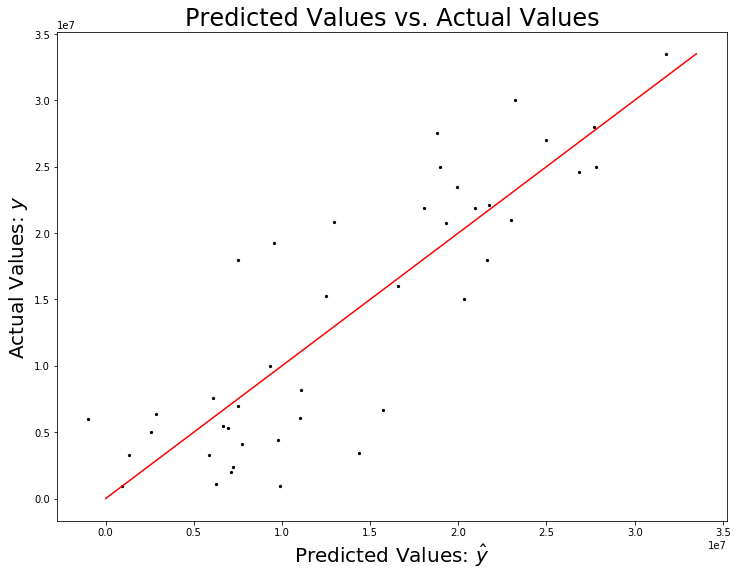

In [153]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [154]:
r2_score(y, y_pred)

0.7351416911938862